In [26]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import numpy as np


import warnings
warnings.filterwarnings('ignore')

Loading dataset

In [27]:
df = pd.read_csv('Downloads/Recommendation_Models/ml_models/travel/original_dataset_kaggle/travel_insurance.csv')

Desplay dataset

In [28]:
df

Agency    Agency Type Distribution Channel  \
0        CBH  Travel Agency              Offline   
1        CBH  Travel Agency              Offline   
2        CWT  Travel Agency               Online   
3        CWT  Travel Agency               Online   
4        CWT  Travel Agency               Online   
...      ...            ...                  ...   
45864    EPX  Travel Agency               Online   
45865    EPX  Travel Agency               Online   
45866    EPX  Travel Agency               Online   
45867    EPX  Travel Agency               Online   
45868    EPX  Travel Agency               Online   

                          Product Name Claim  Duration Destination  Net Sales  \
0                   Comprehensive Plan    No       186    MALAYSIA      -29.0   
1                   Comprehensive Plan    No       186    MALAYSIA      -29.0   
2      Rental Vehicle Excess Insurance    No        65   AUSTRALIA      -49.5   
3      Rental Vehicle Excess Insurance    No        60   AUSTRALIA      -39.6   
4      Rental Vehicle Excess Insurance    No        79       ITALY      -19.8   
...                                ...   ...       ...         ...        ...   
45864         1 way Comprehensive Plan    No         2    MALAYSIA       20.0   
45865         1 way Comprehensive Plan    No         2   SINGAPORE       27.0   
45866         1 way Comprehensive Plan    No         4    MALAYSIA       20.0   
45867         1 way Comprehensive Plan    No         4    MONGOLIA       38.0   
45868         1 way Comprehensive Plan    No        21   INDONESIA       20.0   

       Commision (in value) Gender  Age  
0                      9.57      F   81  
1                      9.57      F   71  
2                     29.70    NaN   32  
3                     23.76    NaN   32  
4                     11.88    NaN   41  
...                     ...    ...  ...  
45864                  0.00    NaN   35  
45865                  0.00    NaN   35  
45866                  0.00    NaN   62  
45867                  0.00    NaN   35  
45868                  0.00    NaN   36  

[45869 rows x 11 columns]

Prepare Report Profile for the dataset, save it and Desplay it

In [29]:
import pandas as pd
from pandas_profiling import ProfileReport


profile = ProfileReport(df, title='travel Pandas Profiling Report Version 1', explorative=True)

profile.to_file("Downloads/travel/travel_version1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
profile.to_notebook_iframe()

List the unique values of Destination feature

In [31]:
df['Destination'].unique()

array(['MALAYSIA', 'AUSTRALIA', 'ITALY', 'UNITED STATES', 'THAILAND',
       'NORWAY', 'VIET NAM', 'DENMARK', 'JAPAN', 'UNITED KINGDOM',
       'INDONESIA', 'INDIA', 'CHINA', 'FRANCE',
       'TAIWAN, PROVINCE OF CHINA', 'SINGAPORE', 'PHILIPPINES', 'MYANMAR',
       'HONG KONG', 'KOREA, REPUBLIC OF', 'UNITED ARAB EMIRATES',
       'NAMIBIA', 'NEW ZEALAND', 'COSTA RICA', 'POLAND', 'SPAIN',
       'CZECH REPUBLIC', 'GERMANY', 'SRI LANKA', 'CAMBODIA',
       'SOUTH AFRICA', 'TANZANIA, UNITED REPUBLIC OF',
       "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'NEPAL', 'NETHERLANDS',
       'MACAO', 'CROATIA', 'FINLAND', 'CANADA', 'TUNISIA',
       'RUSSIAN FEDERATION', 'GREECE', 'BELGIUM', 'IRELAND',
       'SWITZERLAND', 'CHILE', 'ISRAEL', 'BANGLADESH', 'ICELAND',
       'PORTUGAL', 'ROMANIA', 'KENYA', 'GEORGIA', 'TURKEY', 'SWEDEN',
       'MALDIVES', 'AUSTRIA', 'ESTONIA', 'SAUDI ARABIA', 'PAKISTAN',
       'QATAR', 'PERU', 'LUXEMBOURG', 'MONGOLIA', 'BRUNEI DARUSSALAM',
       'ARGENTINA', 'CYPRUS',

Drop ISRAEL value from Destination

In [32]:
df = df.loc[df['Destination'] != 'ISRAEL']

Remove the personal features(Agency, Product Name, Distribution Channel) and constant value(Agency Type) and the features that I dont need to recommand an insurance(Claim, Net Sales, Gender, Age, Destination)

In [33]:
df = df.drop('Agency',axis=1)
df = df.drop('Agency Type',axis=1)
df = df.drop('Distribution Channel',axis=1)
df = df.drop('Product Name',axis=1)
df = df.drop('Claim',axis=1)
df = df.drop('Net Sales',axis=1)
df = df.drop('Gender',axis=1)
df = df.drop('Age',axis=1)
df = df.drop('Destination',axis=1)

Droping missing values and duplicates rows and null values of Commision (in value) feature

In [34]:
df =df.dropna()
df =df.drop_duplicates()
df = df.loc[df['Commision (in value)'] != 0.00]

Rename the feature

In [35]:
df.rename(columns={'Commision (in value)': 'Franchise'}, inplace=True)

In [36]:
df

Duration  Franchise
0           186       9.57
2            65      29.70
3            60      23.76
4            79      11.88
5            47      23.76
...         ...        ...
45648        85       5.94
45727         9      30.16
45802       180      47.52
45804        58      77.22
45805       154      47.52

[2891 rows x 2 columns]

Re-generate the version 2 of profile report after the first step of data cleaning

In [37]:
import pandas as pd
from pandas_profiling import ProfileReport


profile = ProfileReport(df, title='travel Pandas Profiling Report Version 2', explorative=True)

profile.to_file("Downloads/travel/travel_version2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
profile.to_notebook_iframe()

# Now we finished with data cleaning , let's deal with data preprocessing

Plot the outliers using IQR method

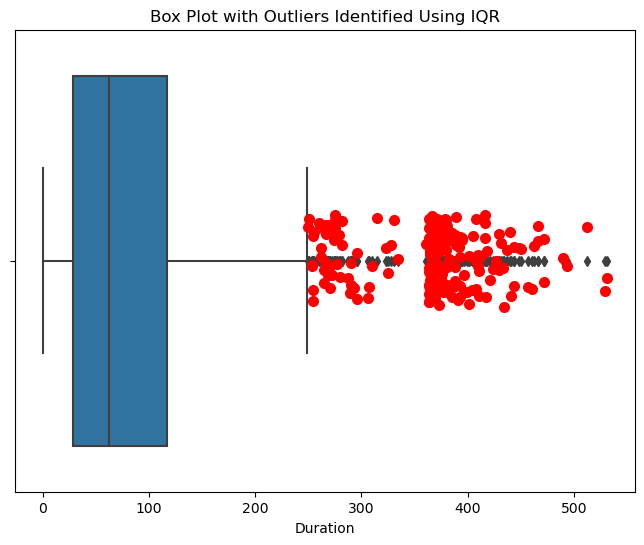

In [39]:
import matplotlib.pyplot as plt
 

# Calculate the IQR
Value = 'Duration'
Q1 = df[Value].quantile(0.25)
Q3 = df[Value].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[Value] < lower_bound) | (df[Value] > upper_bound)]

# Create a box plot with outliers highlighted
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[Value])
sns.stripplot(x=outliers[Value], color='red', size=8, jitter=True)

# Show the plot
plt.title('Box Plot with Outliers Identified Using IQR')
plt.show()

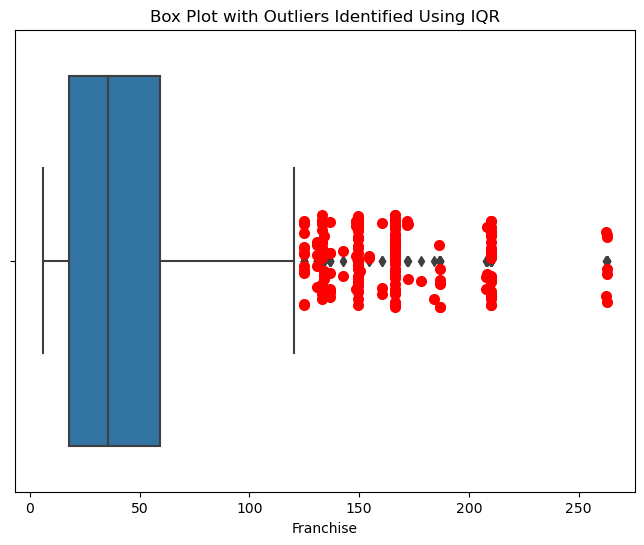

In [40]:
import matplotlib.pyplot as plt
 

# Calculate the IQR
Value = 'Franchise'
Q1 = df[Value].quantile(0.25)
Q3 = df[Value].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[Value] < lower_bound) | (df[Value] > upper_bound)]

# Create a box plot with outliers highlighted
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[Value])
sns.stripplot(x=outliers[Value], color='red', size=8, jitter=True)

# Show the plot
plt.title('Box Plot with Outliers Identified Using IQR')
plt.show()

Drop the outliers

In [41]:
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#drop outliers
df = df[(df['Duration'] > lower_bound) & (df['Duration'] < upper_bound)]

In [42]:
Q1 = df['Franchise'].quantile(0.25)
Q3 = df['Franchise'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

#drop outliers
df = df[(df['Franchise'] > lower_bound) & (df['Franchise'] < upper_bound)]

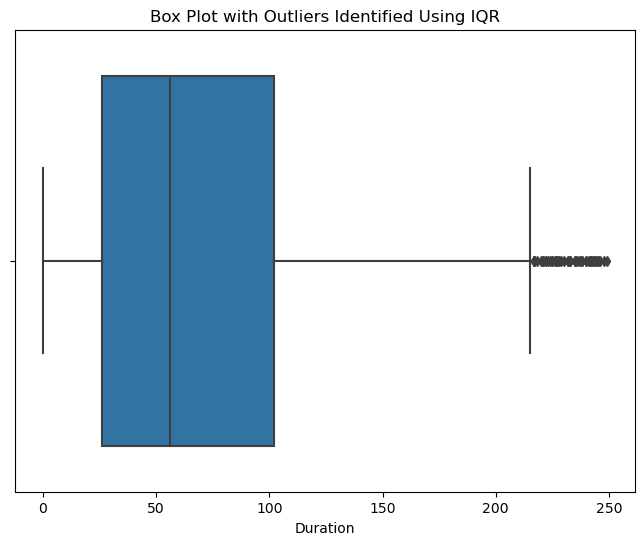

In [43]:
import matplotlib.pyplot as plt

# Calculate the IQR
Value = 'Duration'
Q1 = df[Value].quantile(0.25)
Q3 = df[Value].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Identify outliers
outliers = df[(df[Value] < lower_bound) | (df[Value] > upper_bound)]

# Create a box plot with outliers highlighted
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[Value])
sns.stripplot(x=outliers[Value], color='red', size=8, jitter=True)

# Show the plot
plt.title('Box Plot with Outliers Identified Using IQR')
plt.show()

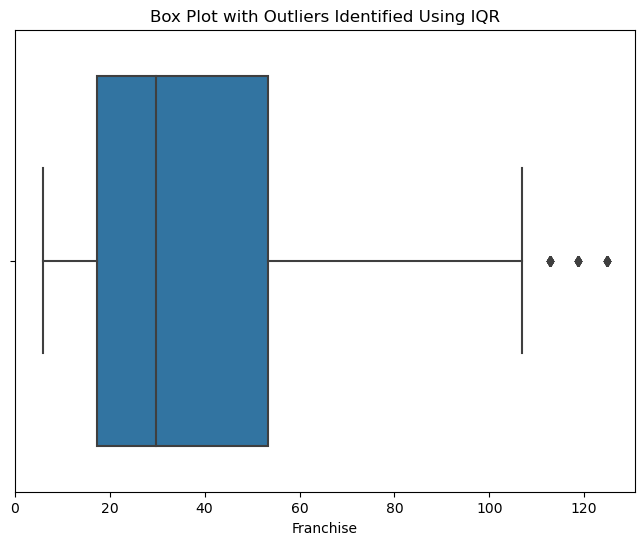

In [44]:
import matplotlib.pyplot as plt
 

# Calculate the IQR
Value = 'Franchise'
Q1 = df[Value].quantile(0.25)
Q3 = df[Value].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Identify outliers
outliers = df[(df[Value] < lower_bound) | (df[Value] > upper_bound)]

# Create a box plot with outliers highlighted
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[Value])
sns.stripplot(x=outliers[Value], color='red', size=8, jitter=True)

# Show the plot
plt.title('Box Plot with Outliers Identified Using IQR')
plt.show()

Re-generate the version 3 of profile report after the first step of data cleaning

In [45]:
import pandas as pd
from pandas_profiling import ProfileReport


profile = ProfileReport(df, title='travel Pandas Profiling Report Version 3', explorative=True)

profile.to_file("Downloads/travel/travel_version3.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
profile.to_notebook_iframe()

In [47]:
df.to_csv('Downloads/travel/travel_dataset_dataset_cleaning_preprocessing.csv' , index=False)

# Unsupervised learning : EM

Comparing with (Davies-Bouldin Index vs. Number of Clusters diagram and Elbow) to detect best k for cluster's number using the dataset df_tsne generated by tsne model without data scaling cuz we want the number of clusters to be big to keeping the car insurance recommended to the client closer to what he or she want

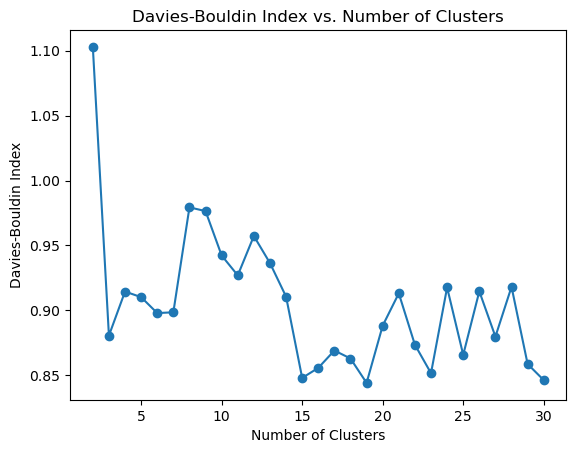

Optimal Number of Clusters: 19


In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

# Range of cluster numbers to try
num_clusters_range = range(2, 31)

# List to store Davies-Bouldin Index scores
davies_bouldin_scores = []

for num_clusters in num_clusters_range:
    gmm = GaussianMixture(n_components=num_clusters, random_state=42)
    cluster_labels = gmm.fit_predict(X)
    davies_bouldin_scores.append(davies_bouldin_score(X, cluster_labels))

# Plotting the Davies-Bouldin Index scores
plt.plot(num_clusters_range, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

# Find the optimal number of clusters with the lowest Davies-Bouldin Index
optimal_num_clusters = num_clusters_range[np.argmin(davies_bouldin_scores)]
print("Optimal Number of Clusters:", optimal_num_clusters)


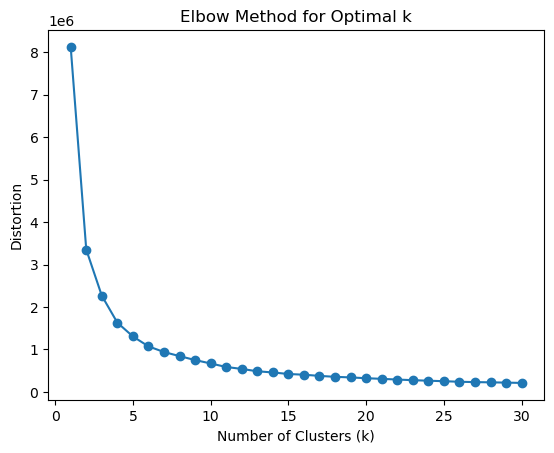

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

distortions = []
for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 31), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()


EM to train the model on the df dataset to get the cluster output , I choose num_clutsers=19 after analysing the interval of each cluster

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster 0 Intervals:
Duration: Min = 84, Max = 162
Franchise: Min = 5.94, Max = 25.68
---------------------
Cluster 1 Intervals:
Duration: Min = 4, Max = 33
Franchise: Min = 17.23, Max = 40.95
---------------------
Cluster 2 Intervals:
Duration: Min = 128, Max = 237
Franchise: Min = 83.16, Max = 95.04
---------------------
Cluster 3 Intervals:
Duration: Min = 7, Max = 35
Franchise: Min = 45.5, Max = 124.74
---------------------
Cluster 4 Intervals:
Duration: Min = 12, Max = 45
Franchise: Min = 5.94, Max = 17.82
---------------------
Cluster 5 Intervals:
Duration: Min = 38, Max = 98
Franchise: Min = 41.42, Max = 65.34
---------------------
Cluster 6 Intervals:
Duration: Min = 192, Max = 246
Franchise: Min = 9.57, Max = 11.88
---------------------
Cluster 7 Intervals:
Duration: Min = 168, Max = 249
Franchise: Min = 17.82, Max = 77.22
---------------------
Cluster 8 Intervals:
Duration: Min = 124, Max = 179
Franchise: Min = 25.68, Max = 53.46
---------------------
Cluster 9 Intervals:
Dur

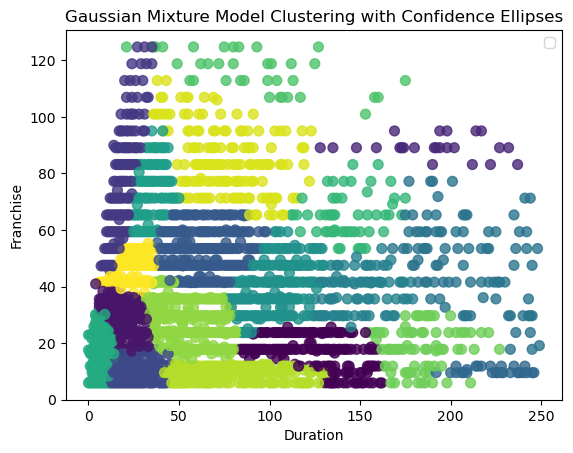

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

scaler = StandardScaler()
X = scaler.fit_transform(df)


# Choose the number of clusters (you may need to tune this)
num_clusters = 19

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(X)

# Predict cluster labels
labels = gmm.predict(X)

# Add cluster labels to the DataFrame
df['Cluster'] = labels

# Print intervals for each cluster
for i in range(num_clusters):
    cluster_indices = np.where(labels == i)[0]
    cluster_data = df.iloc[cluster_indices]

    feature1_interval = (cluster_data['Duration'].min(), cluster_data['Duration'].max())
    feature2_interval = (cluster_data['Franchise'].min(), cluster_data['Franchise'].max())

    print(f"Cluster {i} Intervals:")
    print(f"Duration: Min = {feature1_interval[0]}, Max = {feature1_interval[1]}")
    print(f"Franchise: Min = {feature2_interval[0]}, Max = {feature2_interval[1]}")
    print("---------------------")

# Plot the clusters with confidence ellipses
plt.scatter(df['Duration'], df['Franchise'], c=labels, cmap='viridis', s=50, alpha=0.8)



plt.title('Gaussian Mixture Model Clustering with Confidence Ellipses')
plt.xlabel('Duration')
plt.ylabel('Franchise')
plt.legend()
plt.show()


In [54]:
df

Duration  Franchise  Cluster
0           186       9.57       14
2            65      29.70       15
3            60      23.76       15
4            79      11.88       16
5            47      23.76       15
...         ...        ...      ...
45648        85       5.94       16
45727         9      30.16       11
45802       180      47.52        7
45804        58      77.22       17
45805       154      47.52        8

[2644 rows x 3 columns]

In [55]:
df.to_csv('Downloads/travel/travel_model_dataset.csv', index=False)

# Supervised learning : Random Forest

Train the robust classifier ml model Random Forset on the dataset df which contains Duration , Franchise and Cluster output and Evaluate it

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


# Split the data into features and target
X = df[['Duration', 'Franchise']]
y = df['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest as an example)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict the target labels on the test set
y_pred = classifier.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate and print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Get feature importances
feature_importances = classifier.feature_importances_

# Print feature importances
print("\nFeature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")


Confusion Matrix:
[[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  1  0  0 39  0  0  0  0  0  0  0  0  0  0  2  2  0  0]
 [ 0  0  0  0  0 53  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0 62  0  0  0]
 [ 0  0  0  0  1  0  0

Test the model classifier

In [52]:
y_pred = classifier.predict(X_test)
print(y_pred)

[10  4  9  5 15  5 16  6  0  0 16 11  1 17  4  6 15  1 17 18  1  0 11  0
  4 17 11  5 10  1 17  8 15 11  4 11  5 10 18 17  1 15  5  7 11  9  0  4
 15  3 10  4  4  3 10 18 15  5  4  5 17 15 16 15 16  1 15  3 15  1 16 17
 11  1  3  5 10  0  5  1  9  0 18 15  7  1 16  3 15 10 16 10  0 14  3 14
 18 10 16  2 15 17  1  7 11  4  9 11 18 17 16  4 15 11  1  9  6 15  5 15
  5 16 10  1  1  1  5 15 13 16 11 15 16  1  1  9  3 15  3 11 11  0 15  5
 12  7 17  0  5 14 16 14  0 11 15  8  5 16 16 18 15 16  4  4 15  0  3  1
 15 10 16  7  5 17 15  9  3  5  5  1 17  4  9 16  8 11  0 14 10  3  4  0
 16 18  5 15  5 16  1  7  7 15  5 16  0  9 14 15 15 16  8 18  9 15 17  4
 17 16 14 18  6  1 16  1  0  4 17  9 17 16 16  3  9  1 16 11  4 11 17  2
  0 11  7  0 11 17 11 17  1 10  7  5 11 13  5  4 16 16  1 11 17 18 15  0
 18  1 11 12  0 15 10  5 11 15  1 17 16  0 17  4  1  0 18 16 11 17  2 16
 12  1 16  4 15  4 10  5 16 17  5  4  3 16  0  8 15  1  9  3  5  1  5 11
 10  5 15 14  5 16 17  4 13  3  5 18 15  9  1 15  0

Export the model in an external file with joblib extension to use it for deployment

In [53]:
import joblib

joblib.dump(classifier, 'Downloads/travel/travel_random_forest_model.joblib')

['Downloads/travel/travel_random_forest_model.joblib']